In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

k1 = 4000000
k2 = 2.0
k3 = 3000
k4 = 55.2
k5 = 7000
k6 = 0.09
k7 = 0.23

In [2]:
print('\nSimulation time: \n')
timerange = float(input())

print('\nHigh kf range : type 0, Low kf range : type 1 \n')
kfrange = float(input())

print('Step size: \n')
timestep = float(input())

print('kf: \n')
kf = float(input())

if kfrange == 0:
    A = 0.14
    C = 0.001
    H = 0.26
    M = 0.3
    alpha = 333.3
    beta = 0.2609
    init = np.array([0.446751, 5.275282, 0.393890])
else:
    A = 0.1
    C = 0.000833
    H = 0.26
    M = 0.25
    alpha = 666.7
    beta = 0.3478
    init = np.array([0.0468627, 0.89870, 0.846515])

iteration = np.arange(0.0, timerange, timestep)

T_0 = 1/(10.0*k2*A*H*C)
X_0 = k2*A*H**2/k5
Y_0 = 4.0*k2*A*H**2/k5
Z_0 = C*A/40.0*M
V_0 = 4.0*A*H*C/M**2

def function(init, t):
    dxdt = T_0*(-k1*H*Y_0*init[0]*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)+k2*A*H**2*Y_0/X_0*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)-2*k3*X_0*init[0]**2+0.5*k4*A**0.5*H**1.5*X_0**(-0.5)*(C-Z_0*init[1])*\
        init[0]**0.5-0.5*k5*Z_0*init[0]*init[1]-kf*init[0])
    dzdt = T_0*(k4*A**0.5*H**1.5*X_0**0.5*(C/Z_0-init[1])*init[0]**0.5-k5*X_0*init[0]*init[1]-\
        alpha*k6*V_0*init[1]*init[2]-beta*k7*M*init[1]-kf*init[1])
    dvdt = T_0*(2*k1*H*X_0*Y_0/V_0*init[0]*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)+k2*A*H**2*Y_0/V_0*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0] + \
        k2*A*H**2+kf))/Y_0)+k3*X_0**2/V_0*init[0]**2-alpha*k6*Z_0*init[1]*init[2]-kf*init[2])
    return np.array([dxdt, dzdt, dvdt], dtype=float)

results = odeint(function, init, iteration)


Simulation time: 

5

High kf range : type 0, Low kf range : type 1 

0
Step size: 

0.01
kf: 

0.00216


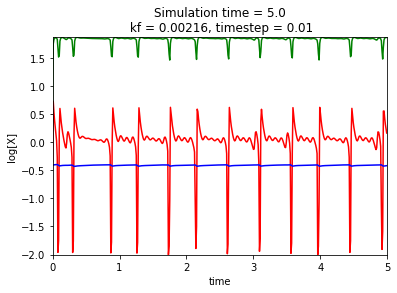

In [3]:
plt.xlabel('time')
plt.ylabel('log[X]')
plt.title('Simulation time = {}\n kf = {}, timestep = {}'.format(timerange,kf,timestep))
plt.axis([0,timerange,np.min(np.log10(results)),np.max(np.log10(results))]) 
plt.plot(iteration,np.log10(results[:,0]), 'r-')
plt.plot(iteration,np.log10(results[:,1]), 'g-')
plt.plot(iteration,np.log10(results[:,2]), 'b-')
plt.show()

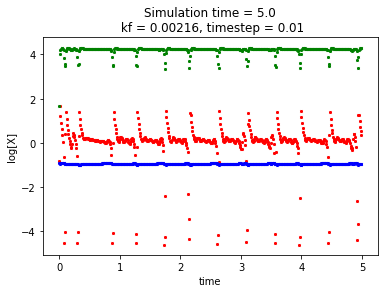

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlabel('time')
plt.ylabel('log[X]')
plt.title('Simulation time = {}\n kf = {}, timestep = {}'.format(timerange,kf,timestep))
ax.scatter(iteration,np.log(results[:,0]), marker='x', color='red', s=5)
ax.scatter(iteration,np.log(results[:,1]), marker='x', color='green', s=5)
ax.scatter(iteration,np.log(results[:,2]), marker='x', color='blue', s=5)
plt.show()

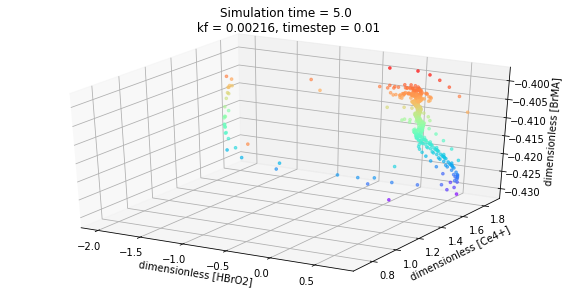

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
x = np.log10(results[:,0])
z = np.log10(results[:,1])
v = np.log10(results[:,2])
plt.title('Simulation time = {}\n kf = {}, timestep = {}'.format(timerange,kf,timestep))
ax.scatter(x,z,v, c=v, s=7, alpha=0.6, cmap=plt.cm.rainbow)
ax.set_xlabel('dimensionless [HBrO2]')
ax.set_ylabel('dimensionless [Ce4+]')
ax.set_zlabel('dimensionless [BrMA]')
plt.show()

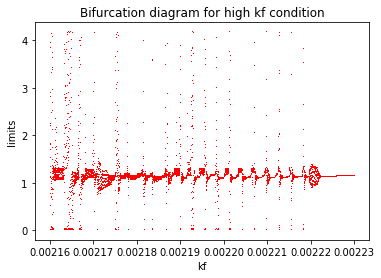

In [6]:
X = []
Y = []

kfrange = np.arange(0.00216,0.00223,0.0000001)
timerange = 10
timestep = 0.01
A = 0.14
C = 0.001
H = 0.26
M = 0.3
alpha = 333.3
beta = 0.2609
init = np.array([0.446751, 5.275282, 0.393890])
iteration = np.arange(0.0, timerange, timestep)
T_0 = 1/(10.0*k2*A*H*C)
X_0 = k2*A*H**2/k5
Y_0 = 4.0*k2*A*H**2/k5
Z_0 = C*A/40.0*M
V_0 = 4.0*A*H*C/M**2

def function(init, t):
    dxdt = T_0*(-k1*H*Y_0*init[0]*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)+k2*A*H**2*Y_0/X_0*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)-2*k3*X_0*init[0]**2+0.5*k4*A**0.5*H**1.5*X_0**(-0.5)*(C-Z_0*init[1])*\
        init[0]**0.5-0.5*k5*Z_0*init[0]*init[1]-kf*init[0])
    dzdt = T_0*(k4*A**0.5*H**1.5*X_0**0.5*(C/Z_0-init[1])*init[0]**0.5-k5*X_0*init[0]*init[1]-\
        alpha*k6*V_0*init[1]*init[2]-beta*k7*M*init[1]-kf*init[1])
    dvdt = T_0*(2*k1*H*X_0*Y_0/V_0*init[0]*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)+k2*A*H**2*Y_0/V_0*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0] + \
        k2*A*H**2+kf))/Y_0)+k3*X_0**2/V_0*init[0]**2-alpha*k6*Z_0*init[1]*init[2]-kf*init[2])
    return np.array([dxdt, dzdt, dvdt], dtype=float)

for kf in kfrange:
    X.append(kf)
    results = odeint(function, init, iteration)
    Y.append(results[990:999,0])
plt.xlabel('kf')
plt.ylabel('limits')
plt.title('Bifurcation diagram for high kf condition')
plt.plot(X, Y, color='red', ls='', marker=',')
plt.show()

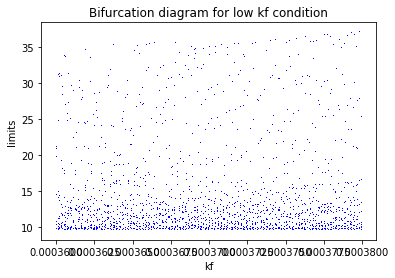

In [10]:
X = []
Y = []

kfrange = np.arange(0.00036,0.00038,0.0000001)
timerange = 10
timestep = 0.01
A = 0.1
C = 0.000833
H = 0.26
M = 0.25
alpha = 666.7
beta = 0.3478
init = np.array([0.0468627, 0.89870, 0.846515])
iteration = np.arange(0.0, timerange, timestep)
T_0 = 1/(10.0*k2*A*H*C)
X_0 = k2*A*H**2/k5
Y_0 = 4.0*k2*A*H**2/k5
Z_0 = C*A/40.0*M
V_0 = 4.0*A*H*C/M**2

def function(init, t):
    dxdt = T_0*(-k1*H*Y_0*init[0]*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)+k2*A*H**2*Y_0/X_0*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)-2*k3*X_0*init[0]**2+0.5*k4*A**0.5*H**1.5*X_0**(-0.5)*(C-Z_0*init[1])*\
        init[0]**0.5-0.5*k5*Z_0*init[0]*init[1]-kf*init[0])
    dzdt = T_0*(k4*A**0.5*H**1.5*X_0**0.5*(C/Z_0-init[1])*init[0]**0.5-k5*X_0*init[0]*init[1]-\
        alpha*k6*V_0*init[1]*init[2]-beta*k7*M*init[1]-kf*init[1])
    dvdt = T_0*(2*k1*H*X_0*Y_0/V_0*init[0]*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0]+\
        k2*A*H**2+kf))/Y_0)+k2*A*H**2*Y_0/V_0*((alpha*k6*Z_0*V_0*init[1]*init[2]/(k1*H*X_0*init[0] + \
        k2*A*H**2+kf))/Y_0)+k3*X_0**2/V_0*init[0]**2-alpha*k6*Z_0*init[1]*init[2]-kf*init[2])
    return np.array([dxdt, dzdt, dvdt], dtype=float)

for kf in kfrange:
    X.append(kf)
    results = odeint(function, init, iteration)
    Y.append(results[990:999,1])
plt.xlabel('kf')
plt.ylabel('limits')
plt.title('Bifurcation diagram for low kf condition')
plt.plot(X, Y, color='blue', ls='', marker=',')
plt.show()